In [1]:
import pandas as pd
import re   # re = regular expression

In [2]:
f = open("WhatsApp_Chat.txt", "r", encoding = 'utf-8')  #The encoding='utf-8' parameter in Python is used to specify the character encoding when working with files, such as when reading or writing text data.

In [5]:
data = f.read()

In [9]:
len(data)

316674

In [11]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s(?:am|pm)\s-\s'

In [13]:
messages = re.split(pattern,data)[1:]

In [17]:
dates = re.findall(pattern,data)

In [21]:
df = pd.DataFrame({"user_messages" : messages, "messages_date" : dates})

In [23]:
df

,user_messages,messages_date
0,Messages and calls are end-to-end encrypted. N...,"20/03/19, 2:20 pm -"
1,"+91 78284 06183 created group ""😊Tuition grp 😊""\n","11/12/16, 7:47 pm -"
2,Sandhya Tuition added you\n,"20/03/19, 2:20 pm -"
3,Sandhya Tuition: Aao sb\n,"20/03/19, 2:21 pm -"
4,Sandhya Tuition: Holi khelne😇\n,"20/03/19, 2:21 pm -"
...,...,...
4871,Mohan Science Clg: आपके पास daat to hai na?\n,"06/12/24, 11:39 pm -"
4872,Mohan Science Clg: Kyuki apke humour ki to daa...,"06/12/24, 11:40 pm -"
4873,+91 81200 83228: Meri beti paida hote hi mere ...,"06/12/24, 11:48 pm -"
4874,+91 81200 83228: Isliye bhobhli hogyi h bichar...,"06/12/24, 11:48 pm -"


In [25]:
df.shape

(4876, 2)

In [27]:
df['messages_date']

0        20/03/19, 2:20 pm - 
1        11/12/16, 7:47 pm - 
2        20/03/19, 2:20 pm - 
3        20/03/19, 2:21 pm - 
4        20/03/19, 2:21 pm - 
                ...          
4871    06/12/24, 11:39 pm - 
4872    06/12/24, 11:40 pm - 
4873    06/12/24, 11:48 pm - 
4874    06/12/24, 11:48 pm - 
4875     07/12/24, 1:44 am - 
Name: messages_date, Length: 4876, dtype: object

In [29]:
# to convert messages_date into date and time formate

df['messages_date'] = pd.to_datetime(df['messages_date'], format ='%d/%m/%y, %I:%M %p - ')

In [31]:
df['messages_date']

0      2019-03-20 14:20:00
1      2016-12-11 19:47:00
2      2019-03-20 14:20:00
3      2019-03-20 14:21:00
4      2019-03-20 14:21:00
               ...        
4871   2024-12-06 23:39:00
4872   2024-12-06 23:40:00
4873   2024-12-06 23:48:00
4874   2024-12-06 23:48:00
4875   2024-12-07 01:44:00
Name: messages_date, Length: 4876, dtype: datetime64[ns]

In [33]:
df.shape

(4876, 2)

In [35]:
df.rename(columns ={"messages_date": "date"}, inplace = True)

In [37]:
df['user_messages']

0       Messages and calls are end-to-end encrypted. N...
1        +91 78284 06183 created group "😊Tuition grp 😊"\n
2                             Sandhya Tuition added you\n
3                              Sandhya Tuition: Aao  sb\n
4                        Sandhya Tuition: Holi  khelne😇\n
                              ...                        
4871        Mohan Science Clg: आपके पास daat to hai na?\n
4872    Mohan Science Clg: Kyuki apke humour ki to daa...
4873    +91 81200 83228: Meri beti paida hote hi mere ...
4874    +91 81200 83228: Isliye bhobhli hogyi h bichar...
4875                           Mohan Science Clg: Awww😅\n
Name: user_messages, Length: 4876, dtype: object

In [39]:
import re

users = []
messages = []

for message in df['user_messages']:
    # Ensure message is a string
    if isinstance(message, str):
        entry = re.split(r'^(.*?):\s', message)
        if len(entry) > 2:  # Valid split
            users.append(entry[1])  # Username
            messages.append(" ".join(entry[2:]))  # Message content
        else:  # Handle group notifications or invalid format
            users.append("group notification")
            messages.append(message)
    else:  # Handle non-string (if any)
        users.append("group notification")
        messages.append("")

# Ensure lists are populated correctly
assert len(users) == len(df), "Users list length mismatch!"
assert len(messages) == len(df), "Messages list length mismatch!"

# Assign to DataFrame
df['user'] = users
df['message'] = messages


In [41]:
print(len(users), len(messages), len(df))



4876 4876 4876


In [43]:
df.drop(columns = ['user_messages'], inplace = True)

In [45]:
df

,date,user,message
0,2019-03-20 14:20:00,group notification,Messages and calls are end-to-end encrypted. N...
1,2016-12-11 19:47:00,group notification,"+91 78284 06183 created group ""😊Tuition grp 😊""\n"
2,2019-03-20 14:20:00,group notification,Sandhya Tuition added you\n
3,2019-03-20 14:21:00,Sandhya Tuition,Aao sb\n
4,2019-03-20 14:21:00,Sandhya Tuition,Holi khelne😇\n
...,...,...,...
4871,2024-12-06 23:39:00,Mohan Science Clg,आपके पास daat to hai na?\n
4872,2024-12-06 23:40:00,Mohan Science Clg,Kyuki apke humour ki to daat deni padegi😂\n
4873,2024-12-06 23:48:00,+91 81200 83228,Meri beti paida hote hi mere sbhi talent ki da...
4874,2024-12-06 23:48:00,+91 81200 83228,Isliye bhobhli hogyi h bichari🤣🤣\n


In [47]:
df['year'] = df['date'].dt.year

In [49]:
df

,date,user,message,year
0,2019-03-20 14:20:00,group notification,Messages and calls are end-to-end encrypted. N...,2019
1,2016-12-11 19:47:00,group notification,"+91 78284 06183 created group ""😊Tuition grp 😊""\n",2016
2,2019-03-20 14:20:00,group notification,Sandhya Tuition added you\n,2019
3,2019-03-20 14:21:00,Sandhya Tuition,Aao sb\n,2019
4,2019-03-20 14:21:00,Sandhya Tuition,Holi khelne😇\n,2019
...,...,...,...,...
4871,2024-12-06 23:39:00,Mohan Science Clg,आपके पास daat to hai na?\n,2024
4872,2024-12-06 23:40:00,Mohan Science Clg,Kyuki apke humour ki to daat deni padegi😂\n,2024
4873,2024-12-06 23:48:00,+91 81200 83228,Meri beti paida hote hi mere sbhi talent ki da...,2024
4874,2024-12-06 23:48:00,+91 81200 83228,Isliye bhobhli hogyi h bichari🤣🤣\n,2024


In [51]:
df['month']= df['date'].dt.month_name()

In [53]:
df['day'] = df['date'].dt.day

In [55]:
df['hour'] = df['date'].dt.hour

In [57]:
df['minute'] = df['date'].dt.minute

In [59]:
df

,date,user,message,year,month,day,hour,minute
0,2019-03-20 14:20:00,group notification,Messages and calls are end-to-end encrypted. N...,2019,March,20,14,20
1,2016-12-11 19:47:00,group notification,"+91 78284 06183 created group ""😊Tuition grp 😊""\n",2016,December,11,19,47
2,2019-03-20 14:20:00,group notification,Sandhya Tuition added you\n,2019,March,20,14,20
3,2019-03-20 14:21:00,Sandhya Tuition,Aao sb\n,2019,March,20,14,21
4,2019-03-20 14:21:00,Sandhya Tuition,Holi khelne😇\n,2019,March,20,14,21
...,...,...,...,...,...,...,...,...
4871,2024-12-06 23:39:00,Mohan Science Clg,आपके पास daat to hai na?\n,2024,December,6,23,39
4872,2024-12-06 23:40:00,Mohan Science Clg,Kyuki apke humour ki to daat deni padegi😂\n,2024,December,6,23,40
4873,2024-12-06 23:48:00,+91 81200 83228,Meri beti paida hote hi mere sbhi talent ki da...,2024,December,6,23,48
4874,2024-12-06 23:48:00,+91 81200 83228,Isliye bhobhli hogyi h bichari🤣🤣\n,2024,December,6,23,48


In [61]:
df.shape

(4876, 8)

In [63]:
df[df['user'] == 'Mohan Science Clg']

,date,user,message,year,month,day,hour,minute
15,2019-03-20 20:03:00,Mohan Science Clg,Bs akele akele khelo\n,2019,March,20,20,3
18,2019-03-20 20:04:00,Mohan Science Clg,Batate to aa jata\n,2019,March,20,20,4
24,2019-03-20 20:05:00,Mohan Science Clg,Are ...n dekha ..n to aa jata😄\n,2019,March,20,20,5
26,2019-03-20 20:07:00,Mohan Science Clg,Yaha ek radha n mil rhi h ...aur tu raniyon ki...,2019,March,20,20,7
27,2019-03-20 20:07:00,Mohan Science Clg,Bhang pina tha kl ....jugad h kya kahi\n,2019,March,20,20,7
...,...,...,...,...,...,...,...,...
4865,2024-12-06 23:23:00,Mohan Science Clg,Ye pahchan me koi sahu ladki hogi usko suna de...,2024,December,6,23,23
4866,2024-12-06 23:23:00,Mohan Science Clg,Are sir ye to hamara chota sa prayas tha\n,2024,December,6,23,23
4871,2024-12-06 23:39:00,Mohan Science Clg,आपके पास daat to hai na?\n,2024,December,6,23,39
4872,2024-12-06 23:40:00,Mohan Science Clg,Kyuki apke humour ki to daat deni padegi😂\n,2024,December,6,23,40


In [65]:
df.shape[0]

4876

In [179]:
words = []
for message in df['message']:
        words.extend(message.split())

In [181]:
len(words)

29502

In [71]:
pip install urlextraxt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [73]:
from urlextract import URLExtract
extractor = URLExtract()
urls = extractor.find_urls("text with urls : www.gmail.com")
print(urls)

['www.gmail.com']


In [81]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [77]:
links

['fav.place',
 'http://bit.ly/प्रधानमंत्री-बेरोजगार-भत्ता-योजना',
 'http://www.cgbsecounter.org/index.aspx',
 'https://www.youtube.com/channel/UCcoRe0C8hxavmPPGL6U0Thw',
 'www.infosys.com/infosys-foundation',
 'https://phon.pe/ru_Roshp7fLW',
 'https://play.google.com/store/apps/details?id=com.loopytime.dreamers',
 'https://youtu.be/JO0FsixY5J8',
 'enter-name.me/?n=-Monika',
 'https://bhilaitimes.com/14-new-corona-patients-in-a-single-day-in-chhattisgarh',
 'https://forms.gle/1XB5Krza9jUJKnyx8',
 'https://youtu.be/IYNEBpcclLE',
 'https://www.instagram.com/p/CDLb9DnDXd4/?igshid=1lt1w9tzh7w5k',
 'https://play.google.com/store/apps/details?id=com.ludo.king',
 'https://itunes.apple.com/in/app/ludo-king/id993090598',
 'https://maps.google.com/?q=21.2055507,81.2990499']

In [83]:
len(links)

16

In [165]:
x = df['user'].value_counts().head()

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
name = x.index
count = x.values

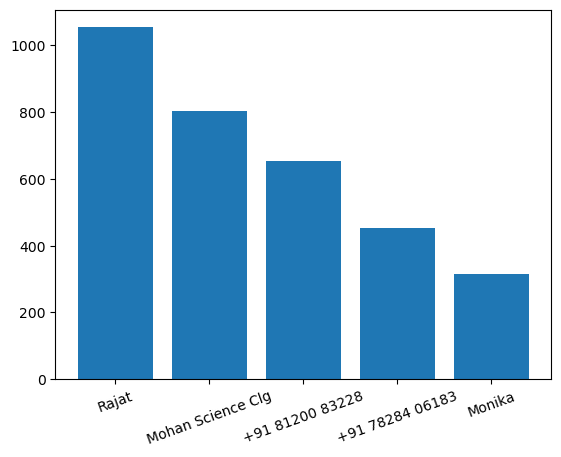

<Figure size 2500x1600 with 0 Axes>

In [167]:
plt.bar(name,count)
plt.xticks(rotation = 20)
plt.figure(figsize=(25, 16), dpi=100)
plt.show()

In [161]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns = {'user':'name','count':'percentage'})

,name,percentage
0,Rajat,21.62
1,Mohan Science Clg,16.45
2,+91 81200 83228,13.39
3,+91 78284 06183,9.29
4,Monika,6.48
5,+91 97550 79668,5.33
6,+91 93406 36543,5.21
7,+91 91658 38320,5.02
8,Sandhya Tuition,4.14
9,Prachi,3.28


In [220]:
temp = df[df['user'] != "group_notification"]
temp = temp[temp['message'] != "<Media omitted>\n"]

In [224]:
words = []
for message in temp['message']:
            words.extend(message.split())

In [228]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(25))

,0,1
0,h,684
1,to,423
2,hai,278
3,me,246
4,के,203
5,ho,195
6,bhai,186
7,ko,177
8,se,166
9,hu,161


In [230]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/586.9 kB ? eta -:--:--
   -- ------------------------------------- 41.0/586.9 kB 1.9 MB/s eta 0:00:01
   ------------------------------------- -- 553.0/586.9 kB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 586.9/586.9 kB 6.1 MB/s eta 0:00:00


In [234]:
import emoji

In [243]:
emojis = []

for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [239]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,543
1,🤣,432
2,🥳,184
3,🎂,171
4,🏻,155
...,...,...
214,🍡,1
215,🫕,1
216,🌼,1
217,♥,1


In [245]:
df

,date,user,message,year,month,day,hour,minute
0,2019-03-20 14:20:00,group notification,Messages and calls are end-to-end encrypted. N...,2019,March,20,14,20
1,2016-12-11 19:47:00,group notification,"+91 78284 06183 created group ""😊Tuition grp 😊""\n",2016,December,11,19,47
2,2019-03-20 14:20:00,group notification,Sandhya Tuition added you\n,2019,March,20,14,20
3,2019-03-20 14:21:00,Sandhya Tuition,Aao sb\n,2019,March,20,14,21
4,2019-03-20 14:21:00,Sandhya Tuition,Holi khelne😇\n,2019,March,20,14,21
...,...,...,...,...,...,...,...,...
4871,2024-12-06 23:39:00,Mohan Science Clg,आपके पास daat to hai na?\n,2024,December,6,23,39
4872,2024-12-06 23:40:00,Mohan Science Clg,Kyuki apke humour ki to daat deni padegi😂\n,2024,December,6,23,40
4873,2024-12-06 23:48:00,+91 81200 83228,Meri beti paida hote hi mere sbhi talent ki da...,2024,December,6,23,48
4874,2024-12-06 23:48:00,+91 81200 83228,Isliye bhobhli hogyi h bichari🤣🤣\n,2024,December,6,23,48


In [247]:
df['month_num'] = df['date'].dt.month

In [261]:
timeline = df.groupby(['year','month','month_num']).count()['message'].reset_index()

In [266]:
time = []

for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+ '-' + str(timeline['year'][i]))

In [268]:
timeline['time'] = time

In [270]:
timeline

,year,month,month-num,message,time
0,2016,December,12,1,December-2016
1,2019,April,4,1501,April-2019
2,2019,August,8,224,August-2019
3,2019,December,12,99,December-2019
4,2019,July,7,209,July-2019
5,2019,June,6,210,June-2019
6,2019,March,3,433,March-2019
7,2019,May,5,104,May-2019
8,2019,November,11,99,November-2019
9,2019,October,10,179,October-2019


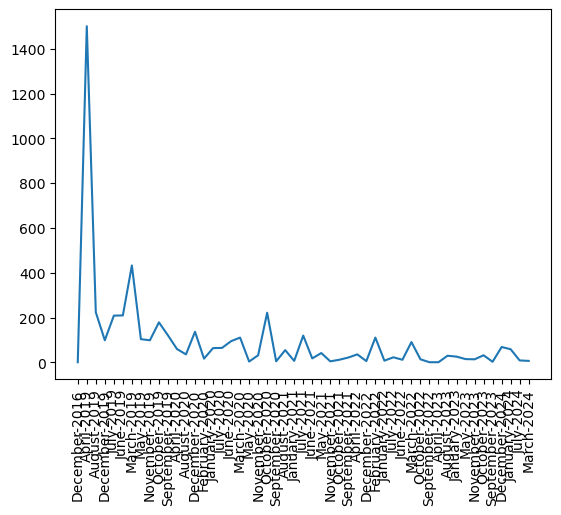

<Figure size 2000x600 with 0 Axes>

In [303]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation = 'vertical')
plt.figure(figsize=(20, 6))
plt.show()

In [306]:
df['only_date'] = df['date'].dt.date

In [308]:
df

,date,user,message,year,month,day,hour,minute,month-num,only_date
0,2019-03-20 14:20:00,group notification,Messages and calls are end-to-end encrypted. N...,2019,March,20,14,20,3,2019-03-20
1,2016-12-11 19:47:00,group notification,"+91 78284 06183 created group ""😊Tuition grp 😊""\n",2016,December,11,19,47,12,2016-12-11
2,2019-03-20 14:20:00,group notification,Sandhya Tuition added you\n,2019,March,20,14,20,3,2019-03-20
3,2019-03-20 14:21:00,Sandhya Tuition,Aao sb\n,2019,March,20,14,21,3,2019-03-20
4,2019-03-20 14:21:00,Sandhya Tuition,Holi khelne😇\n,2019,March,20,14,21,3,2019-03-20
...,...,...,...,...,...,...,...,...,...,...
4871,2024-12-06 23:39:00,Mohan Science Clg,आपके पास daat to hai na?\n,2024,December,6,23,39,12,2024-12-06
4872,2024-12-06 23:40:00,Mohan Science Clg,Kyuki apke humour ki to daat deni padegi😂\n,2024,December,6,23,40,12,2024-12-06
4873,2024-12-06 23:48:00,+91 81200 83228,Meri beti paida hote hi mere sbhi talent ki da...,2024,December,6,23,48,12,2024-12-06
4874,2024-12-06 23:48:00,+91 81200 83228,Isliye bhobhli hogyi h bichari🤣🤣\n,2024,December,6,23,48,12,2024-12-06


In [314]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

In [316]:
daily_timeline

,only_date,message
0,2016-12-11,1
1,2019-03-20,150
2,2019-03-21,102
3,2019-03-22,93
4,2019-03-24,17
...,...,...
260,2024-03-27,5
261,2024-03-28,2
262,2024-07-01,9
263,2024-12-06,68


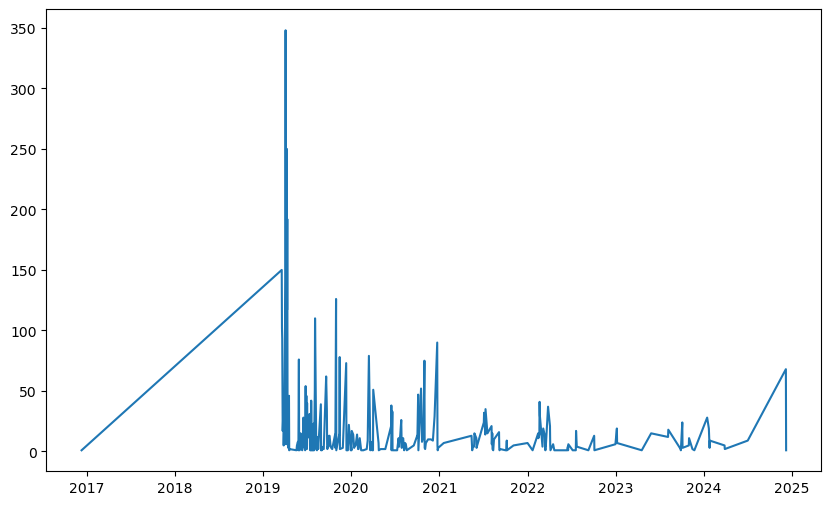

In [368]:
plt.figure(figsize = (10,6))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [327]:
df['day_name'] = df['date'].dt.day_name()

In [332]:
df['day_name'].value_counts()

day_name
Friday       1075
Thursday     1036
Wednesday     729
Saturday      626
Monday        601
Sunday        545
Tuesday       264
Name: count, dtype: int64

In [334]:
df['month'].value_counts()

month
April        1598
March         642
October       459
July          426
August        345
June          335
December      312
May           165
January       164
September     152
November      150
February      128
Name: count, dtype: int64

In [336]:
df

,date,user,message,year,month,day,hour,minute,month-num,only_date,day_name
0,2019-03-20 14:20:00,group notification,Messages and calls are end-to-end encrypted. N...,2019,March,20,14,20,3,2019-03-20,Wednesday
1,2016-12-11 19:47:00,group notification,"+91 78284 06183 created group ""😊Tuition grp 😊""\n",2016,December,11,19,47,12,2016-12-11,Sunday
2,2019-03-20 14:20:00,group notification,Sandhya Tuition added you\n,2019,March,20,14,20,3,2019-03-20,Wednesday
3,2019-03-20 14:21:00,Sandhya Tuition,Aao sb\n,2019,March,20,14,21,3,2019-03-20,Wednesday
4,2019-03-20 14:21:00,Sandhya Tuition,Holi khelne😇\n,2019,March,20,14,21,3,2019-03-20,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
4871,2024-12-06 23:39:00,Mohan Science Clg,आपके पास daat to hai na?\n,2024,December,6,23,39,12,2024-12-06,Friday
4872,2024-12-06 23:40:00,Mohan Science Clg,Kyuki apke humour ki to daat deni padegi😂\n,2024,December,6,23,40,12,2024-12-06,Friday
4873,2024-12-06 23:48:00,+91 81200 83228,Meri beti paida hote hi mere sbhi talent ki da...,2024,December,6,23,48,12,2024-12-06,Friday
4874,2024-12-06 23:48:00,+91 81200 83228,Isliye bhobhli hogyi h bichari🤣🤣\n,2024,December,6,23,48,12,2024-12-06,Friday


In [356]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour)+'-'+str('00'))
    elif hour == 0:
        period.append(str('00') + '-' + str(hour+1))
    else:
        period.append(str(hour) + '-' + str(hour+1))

In [358]:
df['period'] = period

In [360]:
df

,date,user,message,year,month,day,hour,minute,month-num,only_date,day_name,period
0,2019-03-20 14:20:00,group notification,Messages and calls are end-to-end encrypted. N...,2019,March,20,14,20,3,2019-03-20,Wednesday,14-15
1,2016-12-11 19:47:00,group notification,"+91 78284 06183 created group ""😊Tuition grp 😊""\n",2016,December,11,19,47,12,2016-12-11,Sunday,19-20
2,2019-03-20 14:20:00,group notification,Sandhya Tuition added you\n,2019,March,20,14,20,3,2019-03-20,Wednesday,14-15
3,2019-03-20 14:21:00,Sandhya Tuition,Aao sb\n,2019,March,20,14,21,3,2019-03-20,Wednesday,14-15
4,2019-03-20 14:21:00,Sandhya Tuition,Holi khelne😇\n,2019,March,20,14,21,3,2019-03-20,Wednesday,14-15
...,...,...,...,...,...,...,...,...,...,...,...,...
4871,2024-12-06 23:39:00,Mohan Science Clg,आपके पास daat to hai na?\n,2024,December,6,23,39,12,2024-12-06,Friday,23-00
4872,2024-12-06 23:40:00,Mohan Science Clg,Kyuki apke humour ki to daat deni padegi😂\n,2024,December,6,23,40,12,2024-12-06,Friday,23-00
4873,2024-12-06 23:48:00,+91 81200 83228,Meri beti paida hote hi mere sbhi talent ki da...,2024,December,6,23,48,12,2024-12-06,Friday,23-00
4874,2024-12-06 23:48:00,+91 81200 83228,Isliye bhobhli hogyi h bichari🤣🤣\n,2024,December,6,23,48,12,2024-12-06,Friday,23-00


In [362]:
import seaborn as sns

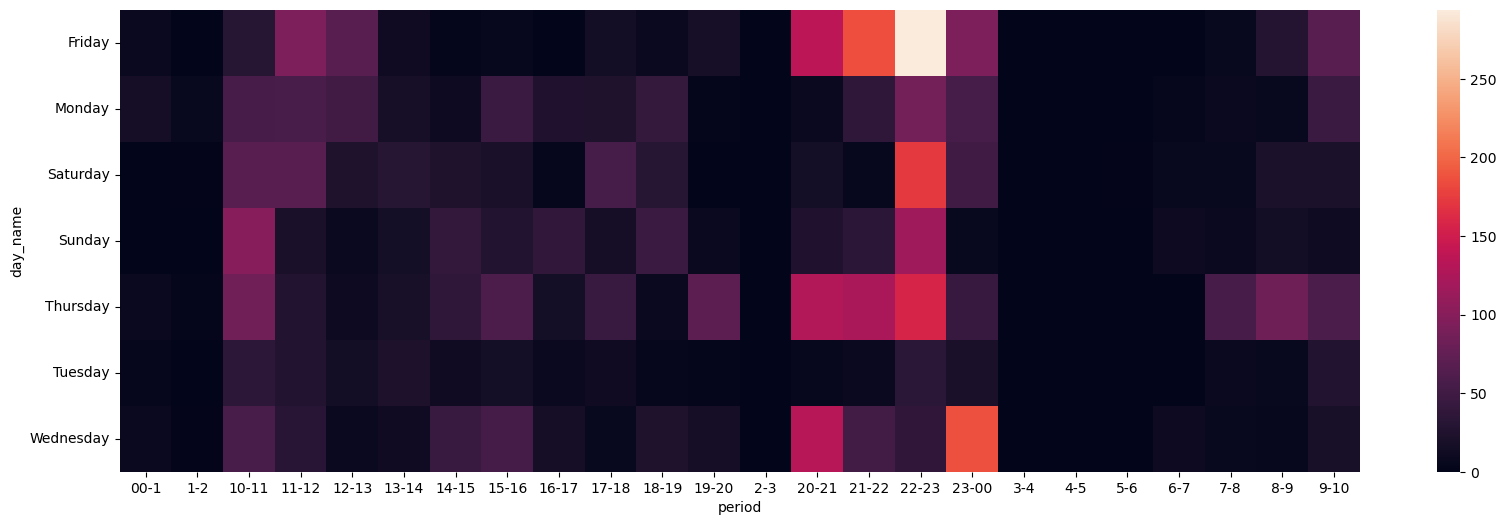

In [366]:
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index = "day_name", columns = 'period', values = 'message', aggfunc = 'count').fillna(0))
plt.yticks(rotation = 'horizontal')
plt.show()